# Kinopoisk film parser

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests    
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from random import randrange
import time 
import socks
import socket
import resource
import sys
import re
import pickle
import itertools


import warnings
warnings.filterwarnings('ignore')


In [2]:
base_url = "http://kinopoisk.ru/top/navigator/m_act[ecountry]/20/m_act[rating]/1%3A/" 
# for search should be at least one filter, this one exludes Algeria and search all films with rating from 1 to 10
order_by = {"kinopoisk": "/order/rating", "imdb":"/order/ex_rating", "year":"/order/year"}

In [2]:
def get_link(order = "imdb", page = 1):
    return base_url + order_by[order] + "/page/{}/#results".format(page)

In [14]:
socks.set_default_proxy(socks.SOCKS5, "localhost", 9150)
socket.socket = socks.socksocket

In [3]:
def get_soup(link, agent = UserAgent().firefox, verbose=False):
    if verbose:
        print("Sending request: ", link)
    response = requests.get(link, headers={'User-Agent': agent})
    if not response.ok:
        return []
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    return soup

In [7]:
soups = []
page_count = 510
block_count = 0
for i in tqdm_notebook(range(page_count)):
    time.sleep(randrange(5))
    soup = get_soup(get_link(page=i), agent = UserAgent().random)
    if 'captcha' in str(soup):
        for j in range(3):
            time.sleep(randrange(7))
            soup = get_soup(get_link(page=i), agent = UserAgent().random)
    if 'captcha' in str(soup):
        block_count = block_count + 1
        soup = None
        print("All request was blocked for page: ", i)
        time.sleep(20)
    soups.append(soup)

All request was blocked for page:  340
All request was blocked for page:  349
All request was blocked for page:  350
All request was blocked for page:  362
All request was blocked for page:  363
All request was blocked for page:  378
All request was blocked for page:  381
All request was blocked for page:  386
All request was blocked for page:  389
All request was blocked for page:  391
All request was blocked for page:  394
All request was blocked for page:  395
All request was blocked for page:  396
All request was blocked for page:  400
All request was blocked for page:  401
All request was blocked for page:  403
All request was blocked for page:  405
All request was blocked for page:  406
All request was blocked for page:  407
All request was blocked for page:  408
All request was blocked for page:  416
All request was blocked for page:  426
All request was blocked for page:  437
All request was blocked for page:  459
All request was blocked for page:  471
All request was blocked f

In [5]:
print (sys.getrecursionlimit())
sys.setrecursionlimit(50000)

3000


In [10]:
file_path = 'file_path'

with open(file_path, 'wb') as f:
    pickle.dump(soups, f)

In [19]:
filtered = [x for x in soups if x is not None]
len(filtered)

424

### Мы собрали информацию примерно 80% страниц фильмов, думаю должно быть достаточно. Теперь надо вытащить идентификаторы фильмов.

In [42]:
film_ids = []
for soup in soups:
    if soup is None:
        continue 
    divs = soup.find_all('div', attrs={'class': "name"})
    for div in divs:
        film_ids.append(re.search('.*/film/(.*)/',div.a['href']).group(1))
        
film_ids[0:10:1][0]

'5127'

In [4]:
def get_film_link(id):
    return 'http://kinopoisk.ru/film/{}'.format(id)

In [12]:
file_path = '/file_path'

with open(file_path, 'rb') as f:
    film_ids = pickle.load(f)

In [10]:
get_soup(get_film_link(film_ids[0]), agent = UserAgent().random)

<!DOCTYPE html>
<html><head><script data-tid="23a8082c">!function(i,t){if(i.Ya=i.Ya||{},Ya.Rum)throw new Error("Rum: interface is already defined");var n=i.performance,e=n&&n.timing&&n.timing.navigationStart||Ya.startPageLoad||+new Date,s=i.requestAnimationFrame;Ya.Rum={enabled:!!n,vsStart:document.visibilityState,vsChanged:!1,_defTimes:[],_defRes:[],_deltaMarks:{},_markListeners:{},_settings:{},_vars:{},init:function(i,t){this._settings=i,this._vars=t},getTime:n&&n.now?function(){return n.now()}:Date.now?function(){return Date.now()-e}:function(){return new Date-e},time:function(i){this._deltaMarks[i]=[this.getTime()]},timeEnd:function(i,t){var n=this._deltaMarks[i];n&&0!==n.length&&n.push(this.getTime(),t)},sendTimeMark:function(i,t,n,e){void 0===t&&(t=this.getTime()),this._defTimes.push([i,t,e]),this.mark(i,t)},sendResTiming:function(i,t){this._defRes.push([i,t])},sendRaf:function(i){var t=this.getSetting("forceFirstPaintTimeSending");if(s&&(t||!this.isVisibilityChanged())){var n=th

In [5]:
def save_films(films, num_of_iter):
    file_path = 'file_path/models/filmsoups{}.pickle'.format(num_of_iter)
    with open(file_path, "wb") as f:
        pickle.dump(films, f)

In [13]:
film_soups = []
not_received = []
count = itertools.count(32)
dump_start = 0
dump_freq = 500

for film_id in tqdm_notebook(film_ids[15500:]):
    try:
        time.sleep(1)
        film_soup = get_soup(get_film_link(film_id), agent = UserAgent().random)
        film_soups.append(film_soup)
        current_iter = next(count)
        if  current_iter % dump_freq == 0:
            print("Saving pack of films with number: {}", current_iter // dump_freq)
            save_films(film_soups[dump_start:dump_start + dump_freq], current_iter // dump_freq)
    except:
        print("Ooops!")

Saving pack of films with number: {} 1
Saving pack of films with number: {} 2
Saving pack of films with number: {} 3
Saving pack of films with number: {} 4
Saving pack of films with number: {} 5
Ooops!
Saving pack of films with number: {} 6
Saving pack of films with number: {} 7
Saving pack of films with number: {} 8
Saving pack of films with number: {} 9
Saving pack of films with number: {} 10
Saving pack of films with number: {} 11



In [ ]:
films = len([x for x in film_soups if 'captcha' not in str(x)])

In [10]:
films = []
for i in tqdm_notebook(range(32)):
    films.extend(film for film in get_films(i) if 'captcha' not in str(film))
films = len([x for x in film_soups if 'captcha' not in str(x)])

KeyboardInterrupt: 

In [6]:
def find_basic_info(soup, text, attr_name, film):
    tmp = soup.find('div',text=text)
    if tmp is not None:
        tmp = tmp.parent.select_one('div:nth-child(2n) a')
        if tmp is not None:
            film[attr_name] = tmp.text.replace(u'\xa0', u'')

def parse(soup):
    film = {}
    film_id = soup.select_one("meta[property='og:url']")
    if film_id is not None:
        film_id = re.search('.*/film/(.*)/',film_id['content'])
        if film_id is not None:
            film['id'] = int(film_id.group(1))
    
    name = soup.select_one('h1', attrs={'class*':'styles_title'})
    if name is not None:
        film['ru_name'] = name.span.text
        
    origin_name = soup.select_one("span[class*='styles_originalTitle']")
    if origin_name is not None:
        film['origin_name'] = origin_name.text
        
    basic_info_div = soup.select_one("div[class*='basicInfo']")
    basic_info_tuples = [("Год производства", 'make_year'), ("Страна", "country"), ("Жанр", 'genres'),
                        ('Слоган', 'Tagline'), ('Режиссер','director'), ('Сценарий', 'scriptwriter'),
                        ('Продюсер','producer'), ('Оператор','operator'), ('Композитор','music'),
                        ('Художник','artist'), ('Монтаж', 'edit'),('Бюджет','cost'), ('Маркетинг','marketing'),
                        ('Сборы в США','usa_fees'), ('Сборы в мире','world_fees'), ('Премьера в Росcии','rus_premiere'),
                        ('Премьера в мире','world_premiere'), ('Релиз на DVD', 'dvd_release')]
    
    if basic_info_div is not None:
        for text, attr_name in basic_info_tuples:
            find_basic_info(soup, text, attr_name, film)
    
    synopsis = soup.select_one("div[class*='styles_synopsis'] p ")
    if synopsis is not None:
        film['synopsis'] = synopsis.text
    
    kinopoisk_rating = soup.select_one('a.film-rating-value')
    if kinopoisk_rating is not None:
        film['kinopoisk_rating'] = kinopoisk_rating.text
    
    imdb_rating = soup.select_one("div.film-sub-rating > span[class*='value']")
    if imdb_rating is not None:
         film['imdb_rating'] = imdb_rating.text
            
    actors = soup.select_one("div.film-crew-block").select("div.film-crew-block > div > ul > li > a")
    if actors is not None and len(actors) != 0:
        film['first_5_actors'] = ",".join(actor_soup.text for actor_soup in actors[:5])
    return film

### Спустя два дня фильмы собраны, теперь пройдемся по всем файлам дампа, отфильтруем файлы с капчей и распарсим нужные поля

In [7]:
def get_file_name(i):
    return 'file_path/models/filmsoups{}.pickle'.format(i)

def get_film_soups(num_of_file):
    soups = []
    all_soups = 0
    try:
        with open(get_file_name(num_of_file), "rb") as f:
            soups = pickle.load(f)
            all_soups = len(soups)
    except FileNotFoundError:
        print("File with i: {} not found", num_of_file)
    soups = [soup for soup in soups if 'captcha' not in str(soup)]
    print("Filtered {} of {} soups as captcha blocked".format((all_soups - len(soups)), all_soups))
    return soups

In [21]:
# parsed_data = [] 
for i in tqdm_notebook(range(0, 32)):
    for soup in get_film_soups(i):
        try:
            parsed_data.append(parse(soup))
        except:
            print("Some error")

Filtered 329 of 469 soups as captcha blocked
Filtered 698 of 969 soups as captcha blocked
Filtered 1044 of 1469 soups as captcha blocked
Filtered 1402 of 1969 soups as captcha blocked
Some error
Filtered 1745 of 2469 soups as captcha blocked
Some error
Filtered 2088 of 2969 soups as captcha blocked
Some error
Filtered 2448 of 3469 soups as captcha blocked
Some error
Some error
Filtered 2808 of 3969 soups as captcha blocked
Some error
Some error
Filtered 3165 of 4469 soups as captcha blocked
Some error
Some error
Some error
Filtered 3545 of 4969 soups as captcha blocked
Some error
Some error
Some error
Filtered 3902 of 5469 soups as captcha blocked
Some error
Some error
Some error



NameError: name 'films' is not defined

In [22]:
file_path = 'file_path'
with open(file_path, "wb") as f:
    pickle.dump(parsed_data, f)

In [9]:
file_path = '../models/parsed_films2.pickle'
with open(file_path, "rb") as f:
    parsed_data .extend( pickle.load(f))

In [10]:
df = pd.DataFrame(parsed_data).drop_duplicates()
df

,id,ru_name,origin_name,make_year,country,genres,director,scriptwriter,producer,operator,...,world_premiere,synopsis,kinopoisk_rating,imdb_rating,first_5_actors,cost,usa_fees,world_fees,rus_premiere,marketing
0,7620.0,С феями шутки плохи,Photographing Fairies,1997,Великобритания,фэнтези,Ник Уиллинг,Крис Харральд,Микеле Камарда,Джон де Борман,...,19 сентября 1997,Фотограф Чарльз Касл тяжело переживает утрату ...,6.256,IMDb: 6.80,"Тоби Стивенс,Эмили Вуф,Бен Кингсли,Фрэнсис Бар...",NaN,NaN,NaN,NaN,NaN
1,1035433.0,Скуби-Ду! На Диком Западе,Scooby-Doo! Shaggy's Showdown,2017,США,мультфильм,Мэтт Питерс,Кэнди Лангдэйл,Алан Барнетт,NaN,...,14 февраля 2017,Главные герои отправляются в уникальное место ...,6.264,IMDb: 6.80,"Фрэнк Уэлкер,Грэй Гриффин,Мэттью Лиллард,Кейт ...",NaN,NaN,NaN,NaN,NaN
2,804697.0,Оно,It Follows,2014,США,ужасы,Дэвид Роберт Митчелл,Дэвид Роберт Митчелл,Дэвид Каплан,Майк Гиулакис,...,17 мая 2014,После сексуальной связи 19-летнюю девушку по и...,6.219,IMDb: 6.80,"Майка Монро,Кейр Гилкрист,Оливия Луккарди,Лили...",$2000000,$14674076,+ $7055435 = $21729511,25 июня 2015,NaN
3,95341.0,Салемские вампиры (ТВ),Salem's Lot,1979,США,ужасы,Тоуб Хупер,Пол Монаш,Анна Коттл,Джулс Бреннер,...,17 ноября 1979,"Бен Мейрс, успешный романист, возвращается дом...",6.199,IMDb: 6.80,"Дэвид Соул,Джеймс Мейсон,Лэнс Кервин,Бонни Бед...",$4000000,NaN,NaN,NaN,NaN
4,711424.0,Глория,Gloria,2013,Чили,драма,Себастьян Лелио,Себастьян Лелио,Луис Кольяр,Бенхамин Эчасаррета,...,10 февраля 2013,58-летняя разведенная женщина начинает скучать...,6.160,IMDb: 6.80,"Паулина Гарсиа,Серхио Эрнандес,Диего Фонтесиль...",NaN,$2107925,+ $4353634 = $6461559,17 апреля 2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,8160.0,Аэропорт,Airport,1970,США,боевик,Джордж Ситон,Джордж Ситон,Росс Хантер,Эрнест Ласло,...,5 марта 1970,"Похоже, что начальнику Международного Аэропорт...",7.127,IMDb: 6.60,"Берт Ланкастер,Дин Мартин,Джин Сиберг,Жаклин Б...",$10000000,$100489151,$100489151,NaN,NaN
22782,760740.0,Макбет,Macbeth,2015,Великобритания,драма,Джастин Курзель,Тодд Луисо,Эйн Каннинг,Адам Аркпоу,...,23 мая 2015,"Холодные поля Шотландии, военный лагерь, всегд...",7.117,IMDb: 6.60,"Майкл Фассбендер,Марион Котийяр,Пэдди Консидай...",$15000000,$1110707,+ $15211360 = $16322067,26 ноября 2015,NaN
22783,493222.0,На грани,Man on a Ledge,2012,США,триллер,Асгер Лет,Пабло Ф. Фенхвес,Лоренцо Ди Бонавентура,Пол Кэмерон,...,26 января 2012,"Экс-полицейский, обвиняемый в преступлении, ко...",7.108,IMDb: 6.60,"Сэм Уортингтон,Элизабет Бэнкс,Джейми Белл,Джен...",$42000000,$18620000,+ $29016031 = $47636031,2 февраля 2012,NaN
22784,271999.0,Запретное царство,The Forbidden Kingdom,2008,США,фэнтези,Роб Минкофф,Джон Фуско,Кэйси Сильвер,Питер Пау,...,4 апреля 2008,"Американский подросток Джейсон, основательно п...",7.097,IMDb: 6.60,"Джет Ли,Джеки Чан,Майкл Ангарано,Хуана Коллинь...",$55000000,$52075270,+ $75904732 = $127980002,24 апреля 2008,NaN


In [82]:
csv_path = "../csv/parsing/films.csv"
df.to_csv(csv_path)
# df = pd.read_csv(csv_path, index_col=0)

In [23]:
df

,id,ru_name,origin_name,make_year,country,genres,director,scriptwriter,producer,operator,...,world_premiere,synopsis,kinopoisk_rating,imdb_rating,first_5_actors,cost,usa_fees,world_fees,rus_premiere,marketing
0,7620,С феями шутки плохи,Photographing Fairies,1997,Великобритания,фэнтези,Ник Уиллинг,Крис Харральд,Микеле Камарда,Джон де Борман,...,19 сентября 1997,Фотограф Чарльз Касл тяжело переживает утрату ...,6.256,6.8,"Тоби Стивенс,Эмили Вуф,Бен Кингсли,Фрэнсис Бар...",0,0,0,NaN,0
1,1035433,Скуби-Ду! На Диком Западе,Scooby-Doo! Shaggy's Showdown,2017,США,мультфильм,Мэтт Питерс,Кэнди Лангдэйл,Алан Барнетт,NaN,...,14 февраля 2017,Главные герои отправляются в уникальное место ...,6.264,6.8,"Фрэнк Уэлкер,Грэй Гриффин,Мэттью Лиллард,Кейт ...",0,0,0,NaN,0
2,804697,Оно,It Follows,2014,США,ужасы,Дэвид Роберт Митчелл,Дэвид Роберт Митчелл,Дэвид Каплан,Майк Гиулакис,...,17 мая 2014,После сексуальной связи 19-летнюю девушку по и...,6.219,6.8,"Майка Монро,Кейр Гилкрист,Оливия Луккарди,Лили...",2000000,14674076,21729511,25 июня 2015,0
3,95341,Салемские вампиры (ТВ),Salem's Lot,1979,США,ужасы,Тоуб Хупер,Пол Монаш,Анна Коттл,Джулс Бреннер,...,17 ноября 1979,"Бен Мейрс, успешный романист, возвращается дом...",6.199,6.8,"Дэвид Соул,Джеймс Мейсон,Лэнс Кервин,Бонни Бед...",4000000,0,0,NaN,0
4,711424,Глория,Gloria,2013,Чили,драма,Себастьян Лелио,Себастьян Лелио,Луис Кольяр,Бенхамин Эчасаррета,...,10 февраля 2013,58-летняя разведенная женщина начинает скучать...,6.160,6.8,"Паулина Гарсиа,Серхио Эрнандес,Диего Фонтесиль...",0,2107925,6461559,17 апреля 2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,8160,Аэропорт,Airport,1970,США,боевик,Джордж Ситон,Джордж Ситон,Росс Хантер,Эрнест Ласло,...,5 марта 1970,"Похоже, что начальнику Международного Аэропорт...",7.127,6.6,"Берт Ланкастер,Дин Мартин,Джин Сиберг,Жаклин Б...",10000000,100489151,100489151,NaN,0
22782,760740,Макбет,Macbeth,2015,Великобритания,драма,Джастин Курзель,Тодд Луисо,Эйн Каннинг,Адам Аркпоу,...,23 мая 2015,"Холодные поля Шотландии, военный лагерь, всегд...",7.117,6.6,"Майкл Фассбендер,Марион Котийяр,Пэдди Консидай...",15000000,1110707,16322067,26 ноября 2015,0
22783,493222,На грани,Man on a Ledge,2012,США,триллер,Асгер Лет,Пабло Ф. Фенхвес,Лоренцо Ди Бонавентура,Пол Кэмерон,...,26 января 2012,"Экс-полицейский, обвиняемый в преступлении, ко...",7.108,6.6,"Сэм Уортингтон,Элизабет Бэнкс,Джейми Белл,Джен...",42000000,18620000,47636031,2 февраля 2012,0
22784,271999,Запретное царство,The Forbidden Kingdom,2008,США,фэнтези,Роб Минкофф,Джон Фуско,Кэйси Сильвер,Питер Пау,...,4 апреля 2008,"Американский подросток Джейсон, основательно п...",7.097,6.6,"Джет Ли,Джеки Чан,Майкл Ангарано,Хуана Коллинь...",55000000,52075270,127980002,24 апреля 2008,0


### Наконец-то мы собрали наш датасет, теперь надо его обработать, привести к нормальным значениям и т.д.

In [11]:
df['kinopoisk_rating'] = df['kinopoisk_rating'].astype(float)

In [12]:
df['imdb_rating'].unique()

array(['IMDb: 6.80', 'IMDb: 6.70', 'IMDb: 6.60', 'IMDb: 6.50',
       'IMDb: 6.40', 'IMDb: 6.30', 'IMDb: 6.20', 'IMDb: 6.10',
       'IMDb: 6.00', 'IMDb: 5.90', 'IMDb: 5.80', 'IMDb: 5.70',
       'IMDb: 5.50', 'IMDb: 5.40', 'IMDb: 5.30', 'IMDb: 5.20',
       'IMDb: 5.10', 'IMDb: 5.00', 'IMDb: 4.90', 'IMDb: 4.80',
       'IMDb: 4.70', 'IMDb: 4.60', 'IMDb: 4.50', 'IMDb: 4.40',
       'IMDb: 4.30', 'IMDb: 4.20', 'IMDb: 4.10', 'IMDb: 4.00',
       'IMDb: 3.90', 'IMDb: 3.80', 'IMDb: 3.70', 'IMDb: 3.60',
       'IMDb: 3.50', 'IMDb: 3.40', 'IMDb: 3.30', 'IMDb: 3.20',
       'IMDb: 3.10', 'IMDb: 3.00', 'IMDb: 2.90', 'IMDb: 2.80',
       'IMDb: 2.70', 'IMDb: 2.60', 'IMDb: 2.50', 'IMDb: 1.70',
       'IMDb: 1.60', 'IMDb: 1.10', 'IMDb: 8.90', 'IMDb: 8.20',
       'IMDb: 8.00', 'IMDb: 7.90', 'IMDb: 7.80', 'IMDb: 7.70',
       'IMDb: 7.60', 'IMDb: 7.50', 'IMDb: 7.40', 'IMDb: 7.30',
       'IMDb: 7.20', 'IMDb: 7.10', 'IMDb: 7.00', 'IMDb: 6.90',
       'IMDb: 5.60', 'IMDb: 9.50', 'IMDb: 9.30', 'IMDb:

In [13]:
df['imdb_rating'] = df['imdb_rating'].astype(str).apply(lambda x: x.split()[1] if x != 'nan' else 0).astype(float)

In [14]:
def to_numeric(string):
    if "=" in string:
        string = string[string.find('='):]
    return 0 if string == 'nan' else ''.join(c for c in string if c.isdigit())

In [15]:
df['cost'] = df['cost'].astype(str).apply(to_numeric).astype('int32')

In [16]:
df['id'] = df['id'].replace(np.nan, 0).astype('int32')

In [17]:
df['make_year'] = df['make_year'].astype('int32')

In [18]:
df['usa_fees'] = df['usa_fees'].astype(str).apply(to_numeric).astype('int32')

In [19]:
df['world_fees'] = df['world_fees'].astype(str).apply(to_numeric).astype('int32')

In [20]:
df['marketing'] = df['marketing'].astype(str).apply(to_numeric).astype('int32')

<AxesSubplot:xlabel='make_year', ylabel='imdb_rating'>

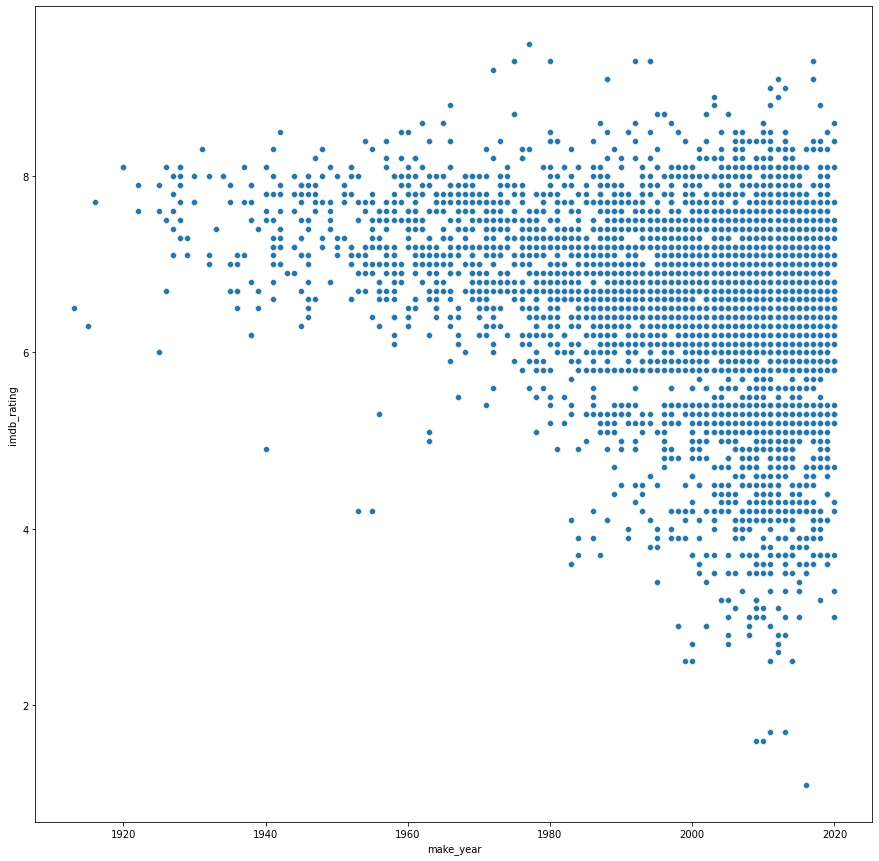

In [27]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, y='imdb_rating', x='make_year')

### Отличная иллюстрация фразы "Раньше было лучше"

In [28]:
df

,id,ru_name,origin_name,make_year,country,genres,director,scriptwriter,producer,operator,...,world_premiere,synopsis,kinopoisk_rating,imdb_rating,first_5_actors,cost,usa_fees,world_fees,rus_premiere,marketing
0,7620,С феями шутки плохи,Photographing Fairies,1997,Великобритания,фэнтези,Ник Уиллинг,Крис Харральд,Микеле Камарда,Джон де Борман,...,19 сентября 1997,Фотограф Чарльз Касл тяжело переживает утрату ...,6.256,6.8,"Тоби Стивенс,Эмили Вуф,Бен Кингсли,Фрэнсис Бар...",0,0,0,NaN,0
1,1035433,Скуби-Ду! На Диком Западе,Scooby-Doo! Shaggy's Showdown,2017,США,мультфильм,Мэтт Питерс,Кэнди Лангдэйл,Алан Барнетт,NaN,...,14 февраля 2017,Главные герои отправляются в уникальное место ...,6.264,6.8,"Фрэнк Уэлкер,Грэй Гриффин,Мэттью Лиллард,Кейт ...",0,0,0,NaN,0
2,804697,Оно,It Follows,2014,США,ужасы,Дэвид Роберт Митчелл,Дэвид Роберт Митчелл,Дэвид Каплан,Майк Гиулакис,...,17 мая 2014,После сексуальной связи 19-летнюю девушку по и...,6.219,6.8,"Майка Монро,Кейр Гилкрист,Оливия Луккарди,Лили...",2000000,14674076,21729511,25 июня 2015,0
3,95341,Салемские вампиры (ТВ),Salem's Lot,1979,США,ужасы,Тоуб Хупер,Пол Монаш,Анна Коттл,Джулс Бреннер,...,17 ноября 1979,"Бен Мейрс, успешный романист, возвращается дом...",6.199,6.8,"Дэвид Соул,Джеймс Мейсон,Лэнс Кервин,Бонни Бед...",4000000,0,0,NaN,0
4,711424,Глория,Gloria,2013,Чили,драма,Себастьян Лелио,Себастьян Лелио,Луис Кольяр,Бенхамин Эчасаррета,...,10 февраля 2013,58-летняя разведенная женщина начинает скучать...,6.160,6.8,"Паулина Гарсиа,Серхио Эрнандес,Диего Фонтесиль...",0,2107925,6461559,17 апреля 2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,8160,Аэропорт,Airport,1970,США,боевик,Джордж Ситон,Джордж Ситон,Росс Хантер,Эрнест Ласло,...,5 марта 1970,"Похоже, что начальнику Международного Аэропорт...",7.127,6.6,"Берт Ланкастер,Дин Мартин,Джин Сиберг,Жаклин Б...",10000000,100489151,100489151,NaN,0
22782,760740,Макбет,Macbeth,2015,Великобритания,драма,Джастин Курзель,Тодд Луисо,Эйн Каннинг,Адам Аркпоу,...,23 мая 2015,"Холодные поля Шотландии, военный лагерь, всегд...",7.117,6.6,"Майкл Фассбендер,Марион Котийяр,Пэдди Консидай...",15000000,1110707,16322067,26 ноября 2015,0
22783,493222,На грани,Man on a Ledge,2012,США,триллер,Асгер Лет,Пабло Ф. Фенхвес,Лоренцо Ди Бонавентура,Пол Кэмерон,...,26 января 2012,"Экс-полицейский, обвиняемый в преступлении, ко...",7.108,6.6,"Сэм Уортингтон,Элизабет Бэнкс,Джейми Белл,Джен...",42000000,18620000,47636031,2 февраля 2012,0
22784,271999,Запретное царство,The Forbidden Kingdom,2008,США,фэнтези,Роб Минкофф,Джон Фуско,Кэйси Сильвер,Питер Пау,...,4 апреля 2008,"Американский подросток Джейсон, основательно п...",7.097,6.6,"Джет Ли,Джеки Чан,Майкл Ангарано,Хуана Коллинь...",55000000,52075270,127980002,24 апреля 2008,0


<AxesSubplot:xlabel='imdb_rating', ylabel='kinopoisk_rating'>

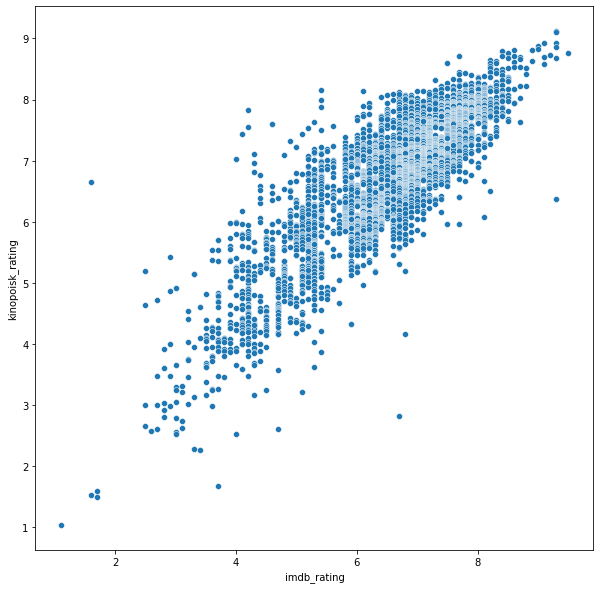

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, y='kinopoisk_rating', x='imdb_rating')

In [72]:
import pymorphy2
from datetime import date

morph = pymorphy2.MorphAnalyzer()
months = dict(zip(['январь',"февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"], range(1,13)))
def to_date(string):
    if string == 'nan':
        return string
    res = []
    for substr in string.split():
        norm = morph.normal_forms(substr)[0]
        if norm in months.keys():
            res.append(int(months[norm]))
        else:
            res.append(int(substr))
    if len(res) != 3:
        return 'nan'
    return date(year=res[2], month=res[1],day=res[0])

In [77]:
df['world_premiere'] = df['world_premiere'].astype(str).apply(to_datpd.e)

ValueError: invalid literal for int() with base 10: '1997-09-19'

In [79]:
df['world_premiere'] = pd.to_datetime(df['world_premiere'])

In [73]:
df['rus_premiere']= df['rus_premiere'].astype(str).apply(to_date)

In [80]:
df['rus_premiere'] = pd.to_datetime(df['rus_premiere'])

In [81]:
df

,id,ru_name,origin_name,make_year,country,genres,director,scriptwriter,producer,operator,...,world_premiere,synopsis,kinopoisk_rating,imdb_rating,first_5_actors,cost,usa_fees,world_fees,rus_premiere,marketing
0,7620,С феями шутки плохи,Photographing Fairies,1997,Великобритания,фэнтези,Ник Уиллинг,Крис Харральд,Микеле Камарда,Джон де Борман,...,1997-09-19,Фотограф Чарльз Касл тяжело переживает утрату ...,6.256,6.8,"Тоби Стивенс,Эмили Вуф,Бен Кингсли,Фрэнсис Бар...",0,0,0,NaT,0
1,1035433,Скуби-Ду! На Диком Западе,Scooby-Doo! Shaggy's Showdown,2017,США,мультфильм,Мэтт Питерс,Кэнди Лангдэйл,Алан Барнетт,NaN,...,2017-02-14,Главные герои отправляются в уникальное место ...,6.264,6.8,"Фрэнк Уэлкер,Грэй Гриффин,Мэттью Лиллард,Кейт ...",0,0,0,NaT,0
2,804697,Оно,It Follows,2014,США,ужасы,Дэвид Роберт Митчелл,Дэвид Роберт Митчелл,Дэвид Каплан,Майк Гиулакис,...,2014-05-17,После сексуальной связи 19-летнюю девушку по и...,6.219,6.8,"Майка Монро,Кейр Гилкрист,Оливия Луккарди,Лили...",2000000,14674076,21729511,2015-06-25,0
3,95341,Салемские вампиры (ТВ),Salem's Lot,1979,США,ужасы,Тоуб Хупер,Пол Монаш,Анна Коттл,Джулс Бреннер,...,1979-11-17,"Бен Мейрс, успешный романист, возвращается дом...",6.199,6.8,"Дэвид Соул,Джеймс Мейсон,Лэнс Кервин,Бонни Бед...",4000000,0,0,NaT,0
4,711424,Глория,Gloria,2013,Чили,драма,Себастьян Лелио,Себастьян Лелио,Луис Кольяр,Бенхамин Эчасаррета,...,2013-02-10,58-летняя разведенная женщина начинает скучать...,6.160,6.8,"Паулина Гарсиа,Серхио Эрнандес,Диего Фонтесиль...",0,2107925,6461559,2014-04-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,8160,Аэропорт,Airport,1970,США,боевик,Джордж Ситон,Джордж Ситон,Росс Хантер,Эрнест Ласло,...,1970-03-05,"Похоже, что начальнику Международного Аэропорт...",7.127,6.6,"Берт Ланкастер,Дин Мартин,Джин Сиберг,Жаклин Б...",10000000,100489151,100489151,NaT,0
22782,760740,Макбет,Macbeth,2015,Великобритания,драма,Джастин Курзель,Тодд Луисо,Эйн Каннинг,Адам Аркпоу,...,2015-05-23,"Холодные поля Шотландии, военный лагерь, всегд...",7.117,6.6,"Майкл Фассбендер,Марион Котийяр,Пэдди Консидай...",15000000,1110707,16322067,2015-11-26,0
22783,493222,На грани,Man on a Ledge,2012,США,триллер,Асгер Лет,Пабло Ф. Фенхвес,Лоренцо Ди Бонавентура,Пол Кэмерон,...,2012-01-26,"Экс-полицейский, обвиняемый в преступлении, ко...",7.108,6.6,"Сэм Уортингтон,Элизабет Бэнкс,Джейми Белл,Джен...",42000000,18620000,47636031,2012-02-02,0
22784,271999,Запретное царство,The Forbidden Kingdom,2008,США,фэнтези,Роб Минкофф,Джон Фуско,Кэйси Сильвер,Питер Пау,...,2008-04-04,"Американский подросток Джейсон, основательно п...",7.097,6.6,"Джет Ли,Джеки Чан,Майкл Ангарано,Хуана Коллинь...",55000000,52075270,127980002,2008-04-24,0
